In [261]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

----

<h3>Task</h3> 

Write Python Implementations of : 
<ul>
    <li>Binary Classification</li>
    <ol>
        <li>Sigmoid Function</li>
        <li>Softmax Function</li>
        <li>Cross-Entropy Function</li>
    </ol>    
</ul>

<ul>
 <li>Multiclass Classification</li>
    <ol>
        <li>Cross-Entropy Function</li>
        <li>Objective Loss Function</li>
    </ol>
</ul>


----

### Binary Classification ###

#### 1. Sigmoid Function : $ \sigma (u) = \frac{e^u}{1+e^u} $

In [193]:
def sigmoid(u): #Converts a real number into a probabilty
    exp_u = np.exp(u)
    result = exp_u / (1 + exp_u)
    return result

Text(0.5, 1.0, 'Demonstration of Sigmoid Function')

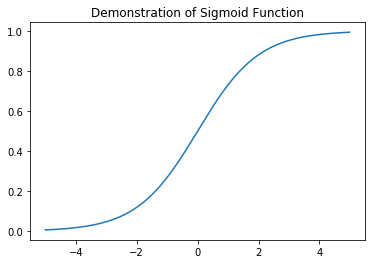

In [194]:
uvals = np.arange(-5,5,.01)
qvals = [sigmoid(u) for u in uvals]
plt.plot(uvals,qvals)
plt.title("Demonstration of Sigmoid Function")

#### 2. Cross Entropy Loss Function (Binary) : $l(Y_{i}, f(x_{i})) = l(p, q) = -p\log(q) - (1 - p)\log(1 - q) $

In [195]:
def cross_entropy_binary(y_pred, x): #(prediction, groundTruth)
    if x == 1: 
        return -np.log(y_pred)
    else:
        return -np.log(1 - y_pred)

In [196]:
cross_entropy_binary(0.9,0.5)

2.302585092994046

#### 3. Soft-Max Function : $$\begin{bmatrix} U_{1} \\ \vdots  \\ U_{k} \end{bmatrix} = \begin{bmatrix} \frac{e^{u_{1}}}{e^{u_{1}} + \dots + e^{u_{k}}} \\ \vdots  \\ \frac{e^{u_{k}}}{e^{u_{1}} + \dots + e^{u_{k}}} \end{bmatrix}$$ 

In [197]:
def softmax(u):
    e_u = np.exp(u - np.max(u)) 
    result = e_u / e_u.sum(axis=0) 
    return result

Text(0.5, 1.0, 'Demonstration of Softmax Function')

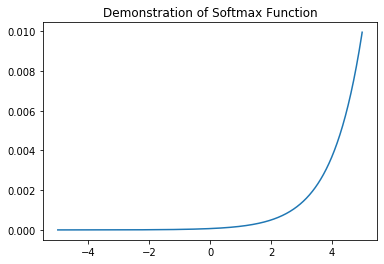

In [198]:
softmax_test = softmax(uvals)
plt.plot(uvals, softmax_test)
plt.title("Demonstration of Softmax Function")

In [199]:
np.sum(softmax_test) #Sum of all the values will be equal to 1

1.0

### Multiclass Classification ###

#### 1. Cross Entropy Loss Function (Multiclass) : $ l(Y_{i}, f(x_{i})) = l(p, q) = -p_{1}\log(q_{1}) - \dots - p_{k}\log(q_{k}) $ , where $p = [p_1, \dots , p_k ]$ and $q = [q_1, \dots , q_k ]$ 


In [200]:
def cross_entropy_multiclass(y_pred,x):
    prediction = -(np.exp(y_pred - np.max(y_pred)))
    truth = np.exp(x - np.max(x))
    result = prediction * np.log(truth)
    return result

In [201]:
y_pred = [1,4,10]
x = [23,45,67]
cross_entropy_multiclass(y_pred,x)

array([ 0.00543003,  0.05453255, -0.        ])

In [202]:
y_pred = [1,2,3]
x = [1,2,3]
cross_entropy_multiclass(y_pred,x)

array([ 0.27067057,  0.36787944, -0.        ])

#### 2. Objective Function L : $\frac{1}{N} \sum_{i=1}^{N} l(Y_{i}, f_{\beta}(x_{i})) $

In [252]:
def objectiveLoss(cross_entropy, arrLength):
    return sum(cross_entropy)/arrLength

In [253]:
data = pd.read_csv('iris.csv')

In [254]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [255]:
data.shape

(150, 5)

In [265]:
filtered = data.iloc[:,:4] #getting the petal width and petal column
y = np.array(filtered) #Changing it into a numpy array
filtered

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [266]:
beta = np.random.randn(data.shape[0],filtered.shape[1]) #Beta vector of 150 rows and 4 columns

In [267]:
iris_crossEntropy = cross_entropy_multiclass(y,beta)

In [268]:
length = len(iris_crossEntropy)

In [269]:
output = objectiveLoss(iris_crossEntropy, length)
output

array([0.51028751, 0.02633771, 0.14933298, 0.00470371])